# Image Processing with Deep Learning
<a href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2025/blob/main/SESSION3/session3_part1_instructor.ipynb" target="_blank"><img alt="Open In Colab" src="https://colab.research.google.com/assets/colab-badge.svg"/></a>

Welcome to the third session of deep learning bootcamp.  Today we are going to learn how computers "see" images and how we can use deep learning for image processing.  Feel free to jot down any notes you have from today's session in this notebook and please feel free to modify and experiment with the code during today's exercises.

## Introduction: How Do Computers See Images?

Before we dive into deep learning, let's understand a fundamental concept: **computers don't see images the way we do**. To a computer, every image is just a grid of numbers!

Let's see this for ourselves using handwritten digits from the MNIST dataset.

In [1]:
# First, let's import the tools we need
import torch
import torchvision
from matplotlib import pyplot as plt
import numpy as np

# Download the MNIST dataset (handwritten digits 0-9)
mnist_data = torchvision.datasets.MNIST(
    root='./data',
    train=True,
    download=True,
    transform=torchvision.transforms.ToTensor()
)

print("Dataset downloaded successfully!")
print(f"We have {len(mnist_data)} images of handwritten digits to work with.")

Dataset downloaded successfully!
We have 60000 images of handwritten digits to work with.


In [2]:
# Function to colourize MNIST digits
def colourize_mnist(image, colour_seed=None):
    """
    Convert a grayscale MNIST image to a coloured version.
    Each digit gets a random colour applied to it.
    """
    if colour_seed is not None:
        np.random.seed(colour_seed)
    
    # Get the grayscale image as numpy array
    img_array = image.squeeze().numpy()
    
    # Create RGB image
    coloured_img = np.zeros((3, 28, 28))
    
    # Generate a random colour (RGB values between 0.3 and 1.0 for visibility)
    colour = np.random.uniform(0.3, 1.0, 3)
    
    # Apply the colour to each channel
    for i in range(3):
        coloured_img[i] = img_array * colour[i]
    
    return torch.tensor(coloured_img, dtype=torch.float32)

print("colourization function ready!")

colourization function ready!


### Seeing an Image as Humans Do

Let's first look at an image the way we normally would:

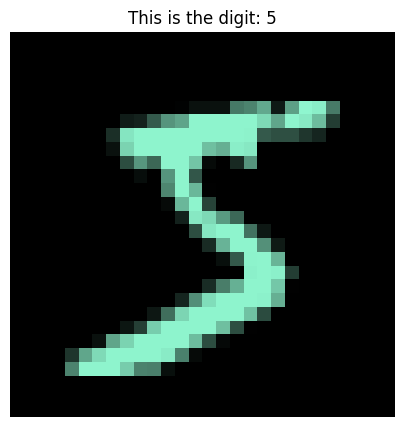

You can see this is a handwritten '5'
The image has 3 colour channels: Red, Green, and Blue


In [3]:
# Get one image from the dataset and colourize it
gray_image, label = mnist_data[0]  # The first image
image = colourize_mnist(gray_image, colour_seed=42)

# Display it
plt.figure(figsize=(5, 5))
# Convert from CHW to HWC format for displaying
plt.imshow(image.permute(1, 2, 0).numpy())
plt.title(f"This is the digit: {label}")
plt.axis('off')
plt.show()

print(f"You can see this is a handwritten '{label}'")
print(f"The image has 3 colour channels: Red, Green, and Blue")

### Seeing an Image as Computers Do: Just Numbers!

Now let's see what the computer actually "sees". 

**colour images have 3 layers** (Red, Green, Blue). Each pixel has 3 numbers - one for each colour!
- Each number ranges from 0.0 (no colour) to 1.0 (full colour intensity)

In [4]:
# Let's look at the three colour channels separately
red_channel = image[0].numpy()
green_channel = image[1].numpy()
blue_channel = image[2].numpy()

print("The image has 3 separate colour layers:")
print(f"- Red channel: {red_channel.shape[0]}×{red_channel.shape[1]} numbers")
print(f"- Green channel: {green_channel.shape[0]}×{green_channel.shape[1]} numbers") 
print(f"- Blue channel: {blue_channel.shape[0]}×{blue_channel.shape[1]} numbers")
print(f"\nTotal: 3 × 28 × 28 = {3*28*28} numbers to represent this one small image!")

# Show a small section of numbers from each channel
print("\n" + "="*60)
print("Here's a 5×5 section from the RED channel (top-left corner):")
print("="*60)
print(np.round(red_channel[10:15, 10:15], 2))

print("\n" + "="*60)
print("Here's the same section from the GREEN channel:")
print("="*60)
print(np.round(green_channel[10:15, 10:15], 2))

print("\n" + "="*60)
print("Here's the same section from the BLUE channel:")
print("="*60)
print(np.round(blue_channel[10:15, 10:15], 2))

print("\n💡 0.0 = no colour, 1.0 = full colour intensity")

The image has 3 separate colour layers:
- Red channel: 28×28 numbers
- Green channel: 28×28 numbers
- Blue channel: 28×28 numbers

Total: 3 × 28 × 28 = 2352 numbers to represent this one small image!

Here's a 5×5 section from the RED channel (top-left corner):
[[0.   0.34 0.56 0.2  0.  ]
 [0.   0.31 0.56 0.42 0.  ]
 [0.   0.02 0.42 0.56 0.15]
 [0.   0.   0.08 0.53 0.5 ]
 [0.   0.   0.   0.18 0.53]]

Here's the same section from the GREEN channel:
[[0.   0.58 0.96 0.34 0.  ]
 [0.   0.53 0.96 0.72 0.01]
 [0.   0.04 0.72 0.96 0.27]
 [0.   0.   0.13 0.91 0.85]
 [0.   0.   0.   0.31 0.91]]

Here's the same section from the BLUE channel:
[[0.   0.49 0.81 0.29 0.  ]
 [0.   0.44 0.81 0.61 0.01]
 [0.   0.04 0.61 0.81 0.22]
 [0.   0.   0.11 0.77 0.72]
 [0.   0.   0.   0.26 0.76]]

💡 0.0 = no colour, 1.0 = full colour intensity


### Visualizing the colour Channels

Let's see each colour channel separately to understand how they combine:

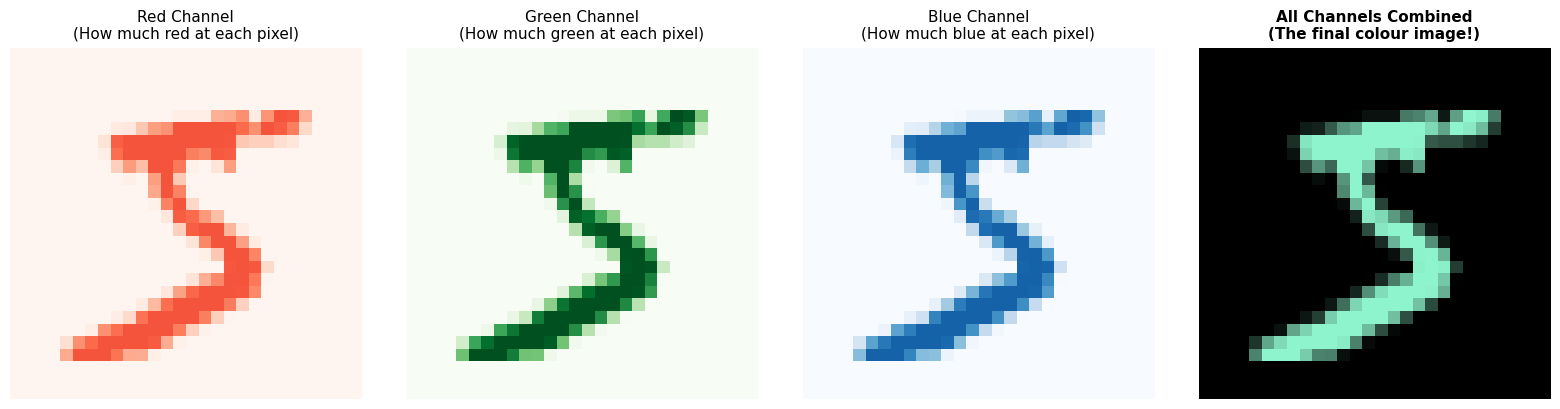


The computer mixes Red + Green + Blue numbers to create the final colours!


In [5]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Show each channel
axes[0].imshow(red_channel, cmap='Reds', vmin=0, vmax=1)
axes[0].set_title('Red Channel\n(How much red at each pixel)', fontsize=11)
axes[0].axis('off')

axes[1].imshow(green_channel, cmap='Greens', vmin=0, vmax=1)
axes[1].set_title('Green Channel\n(How much green at each pixel)', fontsize=11)
axes[1].axis('off')

axes[2].imshow(blue_channel, cmap='Blues', vmin=0, vmax=1)
axes[2].set_title('Blue Channel\n(How much blue at each pixel)', fontsize=11)
axes[2].axis('off')

# Show combined
axes[3].imshow(image.permute(1, 2, 0).numpy())
axes[3].set_title('All Channels Combined\n(The final colour image!)', fontsize=11, fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()

print("\nThe computer mixes Red + Green + Blue numbers to create the final colours!")

### Comparing Numbers to Pixels

Let's zoom into a tiny 6×6 pixel section and see both the numbers AND the colours:

/var/folders/gf/f828qh2x6wq9d3ddr9w3tkv40000gn/T/ipykernel_39138/1249570967.py:52: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/gf/f828qh2x6wq9d3ddr9w3tkv40000gn/T/ipykernel_39138/1249570967.py:52: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/gf/f828qh2x6wq9d3ddr9w3tkv40000gn/T/ipykernel_39138/1249570967.py:52: UserWarning: Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/amashi/.venvs/ml/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128308 (\N{LARGE RED CIRCLE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/amashi/.venvs/ml/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128994 (\N{LARGE GREEN CIRCLE}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes

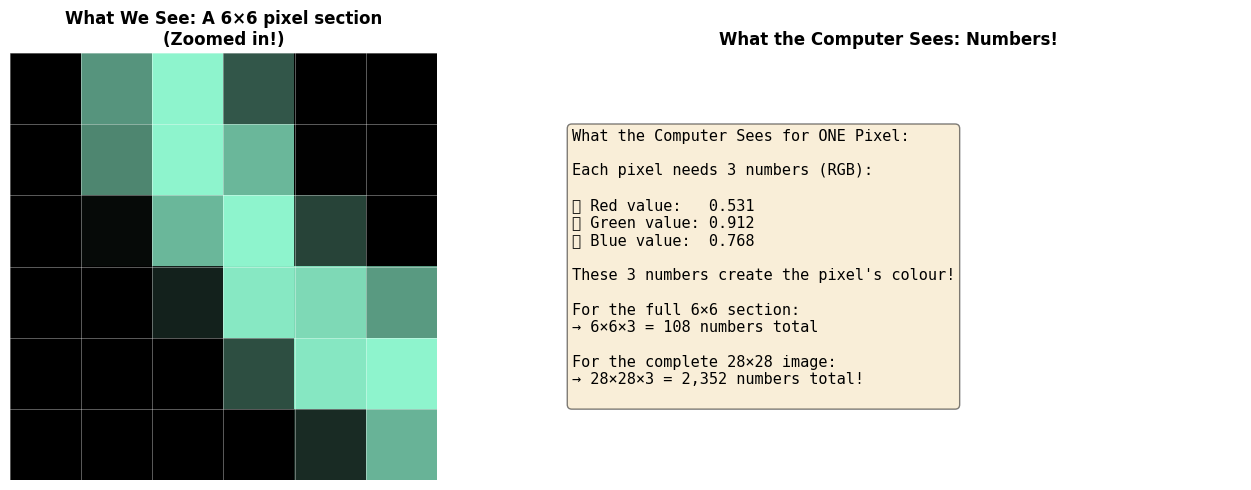

Colour images need 3× as many numbers as grayscale.
• Grayscale: 1 number per pixel (just brightness)
• colour: 3 numbers per pixel (Red, Green, Blue)

This is why colour images take more storage and processing power!


In [6]:
# Take a small 6×6 section
section_size = 6
start_row, start_col = 10, 10

small_section = image[:, start_row:start_row+section_size, start_col:start_col+section_size]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Left: Visual representation (zoomed in)
ax1.imshow(small_section.permute(1, 2, 0).numpy())
ax1.set_title(f'What We See: A {section_size}×{section_size} pixel section\n(Zoomed in!)', fontsize=12, fontweight='bold')
ax1.axis('off')

# Add grid to show individual pixels
for i in range(section_size + 1):
    ax1.axhline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)
    ax1.axvline(i - 0.5, color='white', linewidth=0.5, alpha=0.5)

# Right: The actual numbers for ONE pixel
ax2.axis('off')
ax2.set_xlim(0, 10)
ax2.set_ylim(0, 10)

# Show the RGB values for the center pixel
center_pixel = small_section[:, section_size//2, section_size//2]
r_val = center_pixel[0].item()
g_val = center_pixel[1].item()
b_val = center_pixel[2].item()

text = f"""What the Computer Sees for ONE Pixel:

Each pixel needs 3 numbers (RGB):

🔴 Red value:   {r_val:.3f}
🟢 Green value: {g_val:.3f}
🔵 Blue value:  {b_val:.3f}

These 3 numbers create the pixel's colour!

For the full {section_size}×{section_size} section:
→ {section_size}×{section_size}×3 = {section_size*section_size*3} numbers total

For the complete 28×28 image:
→ 28×28×3 = 2,352 numbers total!
"""

ax2.text(0.5, 5, text, fontsize=11, family='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
         verticalalignment='center')
ax2.set_title('What the Computer Sees: Numbers!', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


print("Colour images need 3× as many numbers as grayscale.")

print("• Grayscale: 1 number per pixel (just brightness)")
print("• colour: 3 numbers per pixel (Red, Green, Blue)")
print("\nThis is why colour images take more storage and processing power!")

![Grayscale visualization](data/grayscale_viz.png)


### Why This Matters for Deep Learning

Understanding that images are numbers is crucial because:
- Computers can only do math with numbers
- Deep learning works by doing mathematical operations on these numbers
- When we "process" an image, we're really just transforming these numbers in smart ways
- **COLOUR images have 3 channels**, so we need to process all three!

Now let's see how we can use this understanding to detect patterns in images!

## Excercise 1: Edge Detection

Now we will perform edge detection on an image using manually designed kernel.  Edges are where the brightness changes suddenly (like going from black to white). We can find them by comparing neighboring pixels.

### Step 1: Get an Image to Work With

Let's pick a digit that has clear edges:

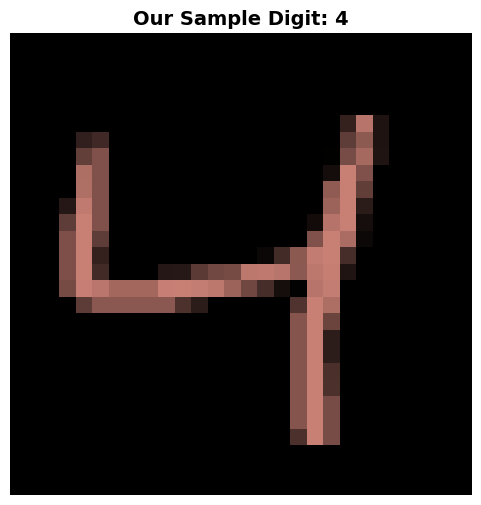

Image shape: torch.Size([3, 28, 28]) = [3 channels, 28 height, 28 width]
Image ready for edge detection!


In [7]:
# Let's find a nice clear digit to work with
# We'll look for a '4' which has good vertical and horizontal edges
for i in range(len(mnist_data)):
    gray_img, lbl = mnist_data[i]
    if lbl == 4:
        sample_gray = gray_img
        sample_label = lbl
        break

# colourize it
sample_image = colourize_mnist(sample_gray, colour_seed=123)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(sample_image.permute(1, 2, 0).numpy())
plt.title(f"Our Sample Digit: {sample_label}", fontsize=14, fontweight='bold')
plt.axis('off')
plt.show()

# Convert to the format we need for processing
img = sample_image.float()
print(f"Image shape: {img.shape} = [3 channels, 28 height, 28 width]")
print("Image ready for edge detection!")

### Step 2: Detecting Vertical Edges

A vertical edge is where the image goes from dark to light (or light to dark) as you move left to right.

For **colour images**, we need to apply the filter to each colour channel separately!

In [8]:
# Create a vertical edge detector for COLOUR images
# Notice: in_channels=3 for RGB!
vertical_filter = torch.nn.Conv2d(
    in_channels=3,      # We have 3 colour channels (RGB)
    out_channels=3,     # We want 3 outputs (one per colour)
    kernel_size=3,      # We look at 3×3 pixels at a time
    bias=False,
    groups=3            # Process each colour independently
)

# Set the Sobel filter pattern for each channel
sobel_kernel = torch.Tensor([[
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
]])

# Apply the same pattern to all 3 colour channels
weights = torch.zeros(3, 1, 3, 3)
for i in range(3):
    weights[i, 0] = sobel_kernel

vertical_filter.weight = torch.nn.Parameter(weights)

print("Vertical edge filter created for colour images!")
print(f"Filter shape: {vertical_filter.weight.shape}")
print("  → [3 output channels, 1 input per group, 3×3 kernel]")
print("\nThe same edge-detection pattern is applied to Red, Green, and Blue separately.")

Vertical edge filter created for colour images!
Filter shape: torch.Size([3, 1, 3, 3])
  → [3 output channels, 1 input per group, 3×3 kernel]

The same edge-detection pattern is applied to Red, Green, and Blue separately.


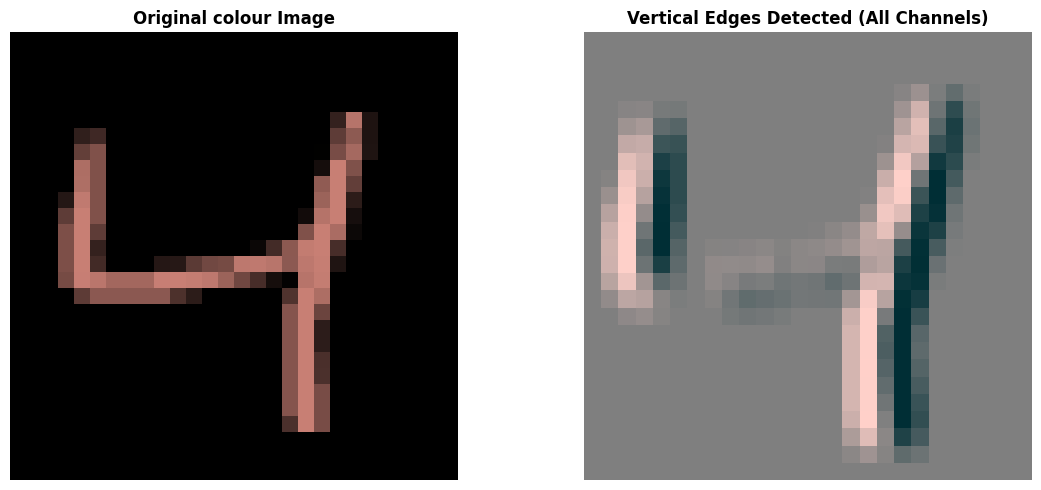

Notice how the vertical parts of the digit '4' are highlighted!
The edge detection worked on all three colour channels at once.


In [9]:
# Apply the filter to find vertical edges
vertical_edges = vertical_filter(img.unsqueeze(0))
vertical_edges = vertical_edges.detach().squeeze()

# # Show the results
# fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# # Top row: Original channels
# axes[0, 0].imshow(img[0].numpy(), cmap='Reds')
# axes[0, 0].set_title('Original - Red Channel', fontsize=11)
# axes[0, 0].axis('off')

# axes[0, 1].imshow(img[1].numpy(), cmap='Greens')
# axes[0, 1].set_title('Original - Green Channel', fontsize=11)
# axes[0, 1].axis('off')

# axes[0, 2].imshow(img[2].numpy(), cmap='Blues')
# axes[0, 2].set_title('Original - Blue Channel', fontsize=11)
# axes[0, 2].axis('off')

# # Bottom row: Edges detected in each channel
# axes[1, 0].imshow(vertical_edges[0].numpy(), cmap='Reds')
# axes[1, 0].set_title('Vertical Edges - Red Channel', fontsize=11, fontweight='bold')
# axes[1, 0].axis('off')

# axes[1, 1].imshow(vertical_edges[1].numpy(), cmap='Greens')
# axes[1, 1].set_title('Vertical Edges - Green Channel', fontsize=11, fontweight='bold')
# axes[1, 1].axis('off')

# axes[1, 2].imshow(vertical_edges[2].numpy(), cmap='Blues')
# axes[1, 2].set_title('Vertical Edges - Blue Channel', fontsize=11, fontweight='bold')
# axes[1, 2].axis('off')

# plt.tight_layout()
# plt.show()

# Also show the combined colour result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(img.permute(1, 2, 0).numpy())
ax1.set_title('Original colour Image', fontsize=12, fontweight='bold')
ax1.axis('off')

# Normalize for display
edges_normalized = (vertical_edges - vertical_edges.min()) / (vertical_edges.max() - vertical_edges.min())
ax2.imshow(edges_normalized.permute(1, 2, 0).numpy())
ax2.set_title('Vertical Edges Detected (All Channels)', fontsize=12, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("Notice how the vertical parts of the digit '4' are highlighted!")
print("The edge detection worked on all three colour channels at once.")

### Step 3: Your Turn - Detect Horizontal Edges!

Can you create a filter to detect horizontal edges in the image?

**Hint:** For horizontal edges, we compare pixels above with pixels below (instead of left vs. right).

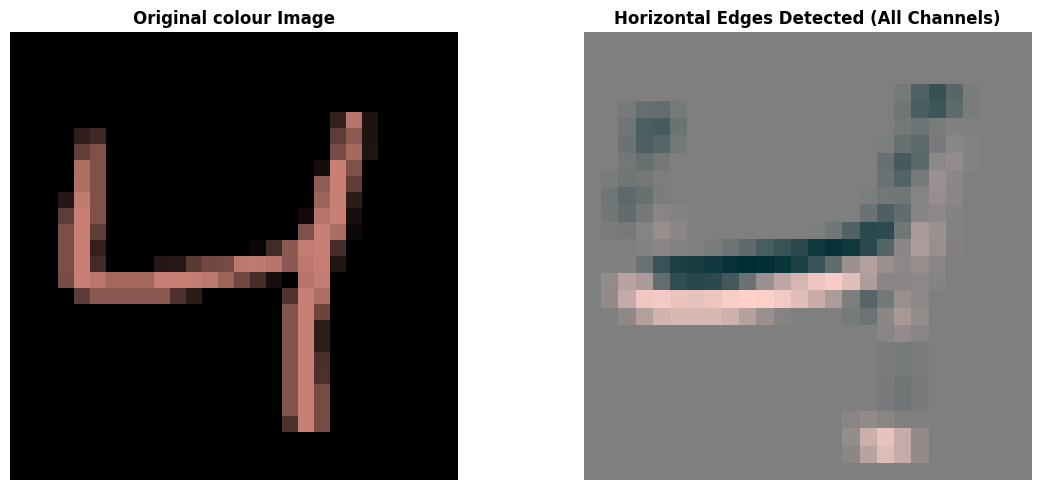

Great job! The horizontal parts of the '4' should now be highlighted.


In [10]:
# Create a horizontal edge detector for colour images
horizontal_filter = torch.nn.Conv2d(
    in_channels=3,
    out_channels=3,
    kernel_size=3,
    bias=False,
    groups=3
)

# TODO: Fill in the pattern for horizontal edges
# Hint: top row should be positive, bottom row should be negative
horizontal_kernel = torch.Tensor([[
    [1, 2, 1],      # Top pixels get positive values
    [0, 0, 0],      # Middle row is 0
    [-1, -2, -1]    # Bottom pixels get negative values
]])

# Apply the same pattern to all 3 colour channels
weights = torch.zeros(3, 1, 3, 3)
for i in range(3):
    weights[i, 0] = horizontal_kernel

horizontal_filter.weight = torch.nn.Parameter(weights)

# Apply the filter
horizontal_edges = horizontal_filter(img.unsqueeze(0))
horizontal_edges = horizontal_edges.detach().squeeze()

# Show the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.imshow(img.permute(1, 2, 0).numpy())
ax1.set_title('Original colour Image', fontsize=12, fontweight='bold')
ax1.axis('off')

# Normalize for display
edges_normalized = (horizontal_edges - horizontal_edges.min()) / (horizontal_edges.max() - horizontal_edges.min())
ax2.imshow(edges_normalized.permute(1, 2, 0).numpy())
ax2.set_title('Horizontal Edges Detected (All Channels)', fontsize=12, fontweight='bold')
ax2.axis('off')

plt.tight_layout()
plt.show()

print("Great job! The horizontal parts of the '4' should now be highlighted.")

### Step 4: Combining Both Edge Types

Now let's combine vertical and horizontal edges to see ALL the edges in our image:

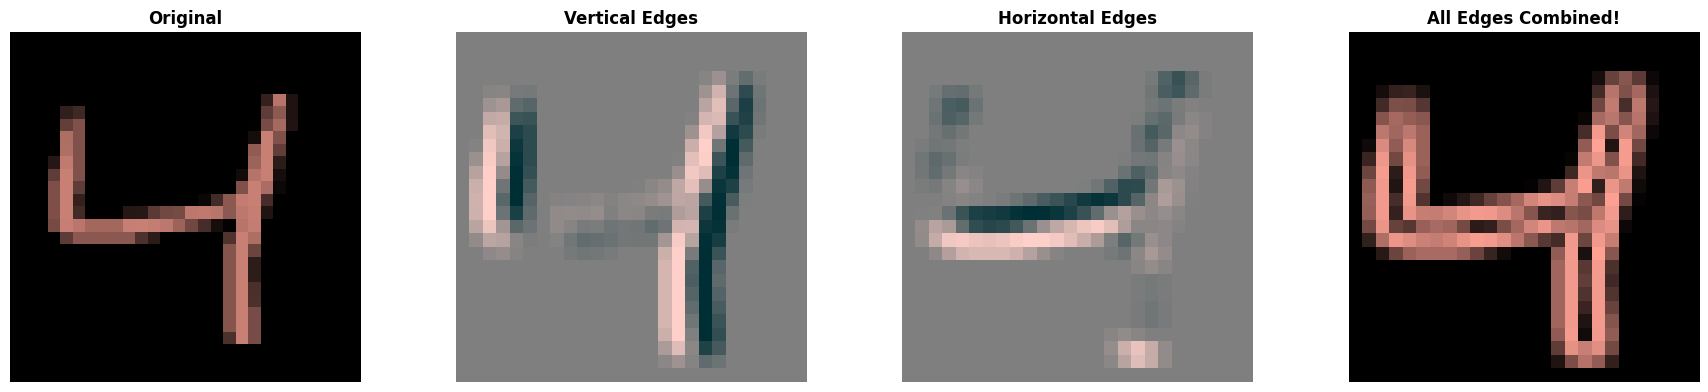

Amazing! You've just detected edges in an image!

What we learned:
1. colour images are grids of numbers - 3 numbers per pixel (R, G, B)
2. We can transform these numbers using filters
3. Filters work on each colour channel separately
4. Different filters detect different patterns (vertical vs horizontal edges)
5. This is the foundation of how neural networks 'see' colour images!


In [11]:
# Combine the edge maps (for each colour channel)
all_edges = torch.sqrt(horizontal_edges**2 + vertical_edges**2)

# Display all stages together
fig, axes = plt.subplots(1, 4, figsize=(18, 4))

axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title('Original', fontsize=12, fontweight='bold')
axes[0].axis('off')

# Normalize vertical edges for display
v_norm = (vertical_edges - vertical_edges.min()) / (vertical_edges.max() - vertical_edges.min())
axes[1].imshow(v_norm.permute(1, 2, 0).numpy())
axes[1].set_title('Vertical Edges', fontsize=12, fontweight='bold')
axes[1].axis('off')

# Normalize horizontal edges for display
h_norm = (horizontal_edges - horizontal_edges.min()) / (horizontal_edges.max() - horizontal_edges.min())
axes[2].imshow(h_norm.permute(1, 2, 0).numpy())
axes[2].set_title('Horizontal Edges', fontsize=12, fontweight='bold')
axes[2].axis('off')

# Normalize combined edges for display
all_norm = (all_edges - all_edges.min()) / (all_edges.max() - all_edges.min())
axes[3].imshow(all_norm.permute(1, 2, 0).numpy())
axes[3].set_title('All Edges Combined!', fontsize=12, fontweight='bold')
axes[3].axis('off')

plt.tight_layout()
plt.show()


print("Amazing! You've just detected edges in an image!")

print("\nWhat we learned:")
print("1. colour images are grids of numbers - 3 numbers per pixel (R, G, B)")
print("2. We can transform these numbers using filters")
print("3. Filters work on each colour channel separately")
print("4. Different filters detect different patterns (vertical vs horizontal edges)")
print("5. This is the foundation of how neural networks 'see' colour images!")

### Understanding What Just Happened with colour

Let's break down the process:

1. **Original colour Image**: We started with a digit made of 3 layers of numbers (R, G, B)
2. **Apply Filter to Each Channel**: We slid a 3×3 pattern over each colour layer separately
3. **Math Operation**: At each position, we multiplied and added numbers
4. **3 Result Channels**: We got edges detected in Red, Green, and Blue separately
5. **Combine**: We can view them together as a colour edge map!

**The Key Difference from Grayscale:**
- Grayscale: 1 filter → 1 output
- colour: 3 filters (one per channel) → 3 outputs
- This is why we used `in_channels=3` and `out_channels=3`!

## Exercise 2: Understanding Convolution Parameters

The filters we used above are called **convolutions**. Let's understand how to control them for colour images.

### 2a: Input and Output Channels

- **Input channels**: How many "layers" the input has (grayscale=1, **colour=3**)
- **Output channels**: How many different feature maps we want to create

For colour images, we can:
1. Process each colour separately (like we did above)
2. Mix colours together to create new features!

Input shape: torch.Size([1, 3, 28, 28])
  - Batch size: 1 (how many images at once)
  - Channels: 3 (colour = 3: R, G, B)
  - Height: 28 pixels
  - Width: 28 pixels

Output shape: torch.Size([1, 6, 28, 28])
  - We now have 6 feature channels!
  - Each filter learned to combine R, G, B in different ways


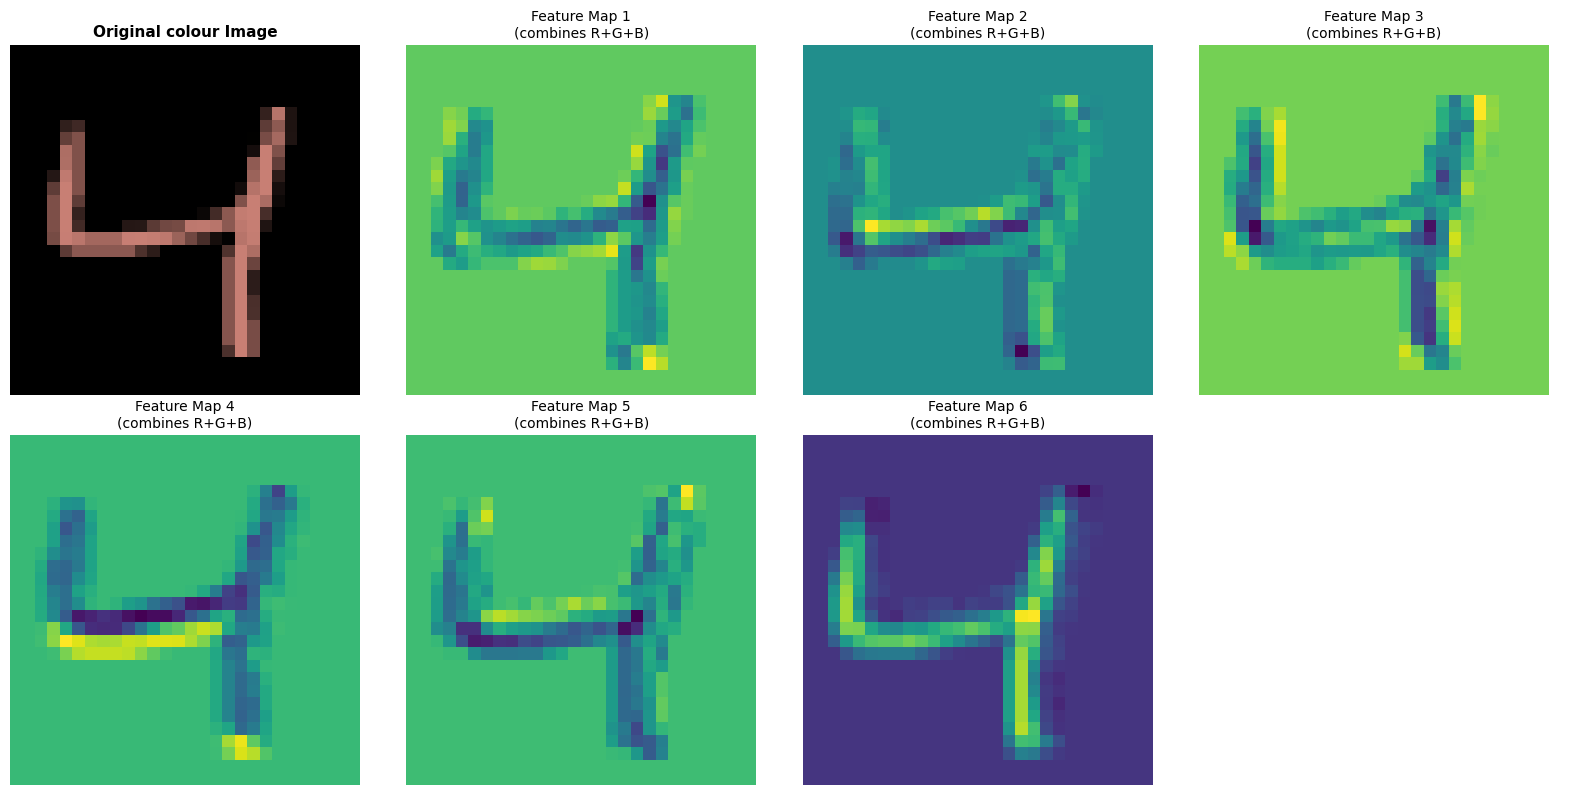


 Each feature map learned different patterns by mixing the colour channels!
In deep learning, these patterns would be trained to detect useful features.


In [12]:
# Let's create a filter that takes 3 inputs (RGB) and produces 6 outputs
# This means we're learning 6 different patterns from the colour image!
multi_filter = torch.nn.Conv2d(
    in_channels=3,      # Our coloured MNIST images have 3 channels (RGB)
    out_channels=6,     # We want to detect 6 different patterns
    kernel_size=3,      # Each filter looks at 3×3 pixels
    padding=1           # Keep the same size
)

# Apply it to our coloured image
x = img.unsqueeze(0)  # Add batch dimension
output = multi_filter(x)

print(f"Input shape: {x.shape}")
print(f"  - Batch size: {x.shape[0]} (how many images at once)")
print(f"  - Channels: {x.shape[1]} (colour = 3: R, G, B)")
print(f"  - Height: {x.shape[2]} pixels")
print(f"  - Width: {x.shape[3]} pixels")

print(f"\nOutput shape: {output.shape}")
print(f"  - We now have {output.shape[1]} feature channels!")
print(f"  - Each filter learned to combine R, G, B in different ways")

# Visualize what each of the 6 filters detected
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

# Show original
axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title('Original colour Image', fontsize=11, fontweight='bold')
axes[0].axis('off')

# Show each of the 6 filter outputs
for i in range(6):
    axes[i+1].imshow(output[0, i].detach().numpy(), cmap='viridis')
    axes[i+1].set_title(f'Feature Map {i+1}\n(combines R+G+B)', fontsize=10)
    axes[i+1].axis('off')

# Hide the last empty subplot
axes[7].axis('off')

plt.tight_layout()
plt.show()

print("\n Each feature map learned different patterns by mixing the colour channels!")
print("In deep learning, these patterns would be trained to detect useful features.")

### 2b: kernel size

**Kernel size** determines how much of the image the filter looks at:
- Small kernels (3×3): Detect fine details
- Large kernels (7×7): Detect larger patterns

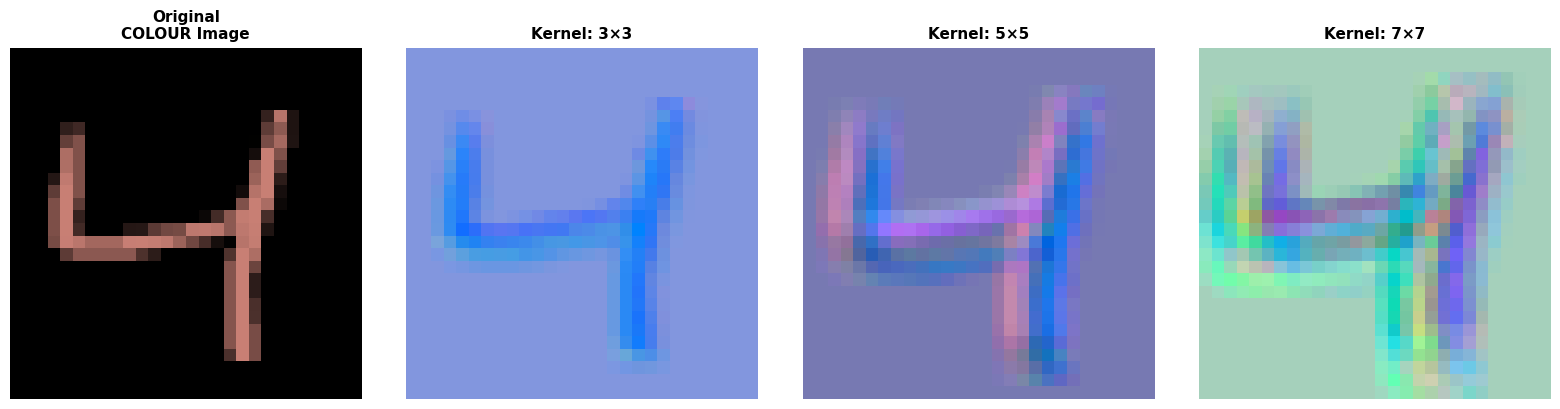

Notice how larger kernels create smoother, more blurred results.
They 'see' more of the image at once, detecting larger patterns.

This works exactly the same for COLOUR as it does for grayscale!


In [13]:
# Let's try different kernel sizes on our COLOUR image
kernel_sizes = [3, 5, 7]

fig, axes = plt.subplots(1, len(kernel_sizes) + 1, figsize=(16, 4))

# Show original
axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title('Original\nCOLOUR Image', fontsize=11, fontweight='bold')
axes[0].axis('off')

# Try each kernel size
for idx, ksize in enumerate(kernel_sizes):
    conv = torch.nn.Conv2d(
        in_channels=3,      # COLOUR input
        out_channels=3,     # COLOUR output
        kernel_size=ksize,
        padding=ksize//2,   # Keep same size
        groups=3            # Process each channel separately
    )
    
    output = conv(img.unsqueeze(0)).squeeze(0)
    
    # Normalize for visualization
    output_norm = (output - output.min()) / (output.max() - output.min())
    
    axes[idx + 1].imshow(output_norm.permute(1, 2, 0).detach().numpy())
    axes[idx + 1].set_title(f'Kernel: {ksize}×{ksize}', fontsize=11, fontweight='bold')
    axes[idx + 1].axis('off')

plt.tight_layout()
plt.show()

print("Notice how larger kernels create smoother, more blurred results.")
print("They 'see' more of the image at once, detecting larger patterns.")
print("\nThis works exactly the same for COLOUR as it does for grayscale!")

### 2c: Stride

**Stride** is how many pixels the filter jumps each time:
- Stride=1: Move one pixel at a time
- Stride=2: Skip every other pixel (makes output smaller)

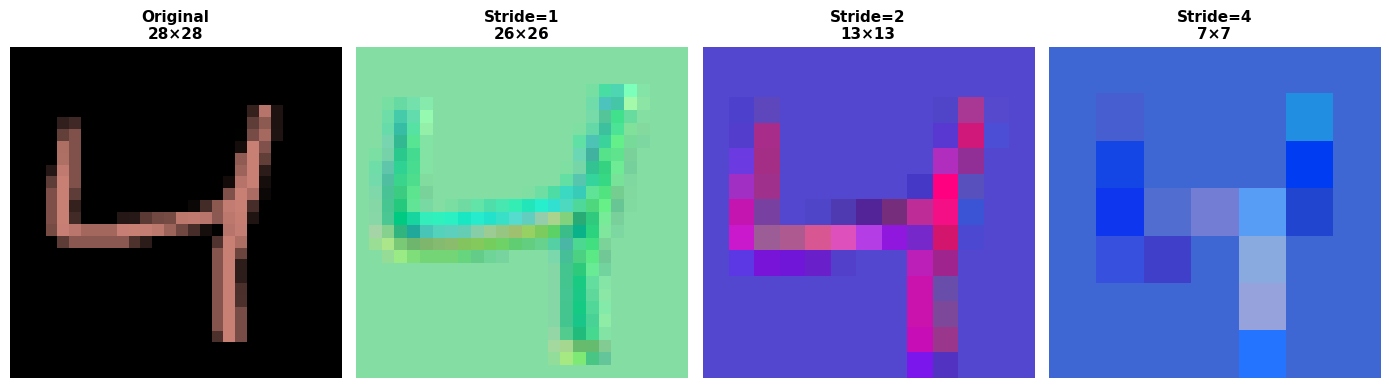

Larger strides make the output smaller - notice how the dimensions shrink!
This helps reduce computation while keeping important COLOUR patterns.


In [14]:
# Compare different strides on COLOUR images
strides = [1, 2, 4]

fig, axes = plt.subplots(1, len(strides) + 1, figsize=(14, 4))

axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title(f'Original\n{img.shape[1]}×{img.shape[2]}', fontsize=11, fontweight='bold')
axes[0].axis('off')

for idx, stride in enumerate(strides):
    conv = torch.nn.Conv2d(
        in_channels=3,
        out_channels=3,
        kernel_size=3,
        stride=stride,
        groups=3
    )
    
    output = conv(img.unsqueeze(0)).squeeze(0)
    
    # Normalize for visualization
    output_norm = (output - output.min()) / (output.max() - output.min())
    
    axes[idx + 1].imshow(output_norm.permute(1, 2, 0).detach().numpy())
    axes[idx + 1].set_title(f'Stride={stride}\n{output.shape[1]}×{output.shape[2]}', 
                           fontsize=11, fontweight='bold')
    axes[idx + 1].axis('off')

plt.tight_layout()
plt.show()

print("Larger strides make the output smaller - notice how the dimensions shrink!")
print("This helps reduce computation while keeping important COLOUR patterns.")

### 2d: Padding

**Padding** adds a border around the image so we don't lose the edges:

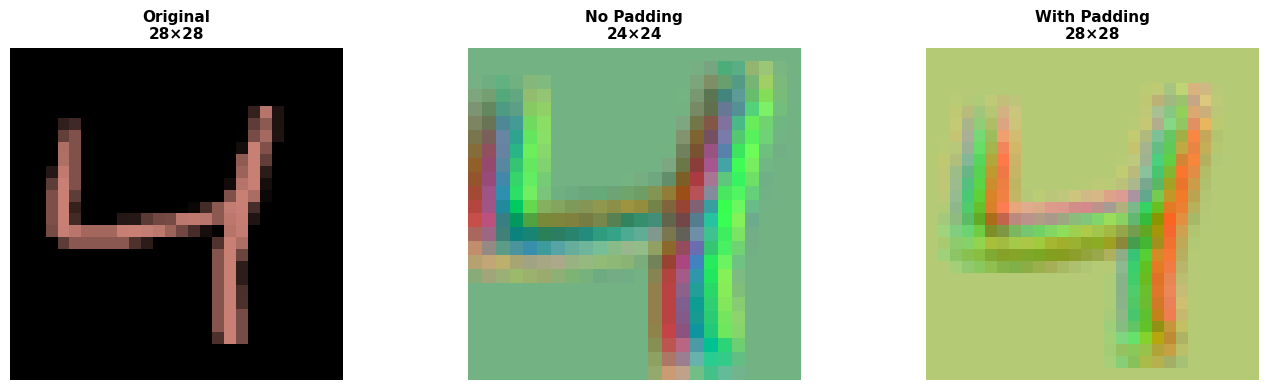

Padding helps preserve image size and edge information!


In [15]:
# Without padding
conv_no_padding = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, padding=0, groups=3)
output_no_padding = conv_no_padding(img.unsqueeze(0)).squeeze(0)

# With padding
conv_with_padding = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=5, padding=2, groups=3)
output_with_padding = conv_with_padding(img.unsqueeze(0)).squeeze(0)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

axes[0].imshow(img.permute(1, 2, 0).numpy())
axes[0].set_title(f'Original\n{img.shape[1]}×{img.shape[2]}', fontsize=11, fontweight='bold')
axes[0].axis('off')

# Normalize outputs for visualization
out_no_pad_norm = (output_no_padding - output_no_padding.min()) / (output_no_padding.max() - output_no_padding.min())
axes[1].imshow(out_no_pad_norm.permute(1, 2, 0).detach().numpy())
axes[1].set_title(f'No Padding\n{output_no_padding.shape[1]}×{output_no_padding.shape[2]}', 
                 fontsize=11, fontweight='bold')
axes[1].axis('off')

out_with_pad_norm = (output_with_padding - output_with_padding.min()) / (output_with_padding.max() - output_with_padding.min())
axes[2].imshow(out_with_pad_norm.permute(1, 2, 0).detach().numpy())
axes[2].set_title(f'With Padding\n{output_with_padding.shape[1]}×{output_with_padding.shape[2]}', 
                 fontsize=11, fontweight='bold')
axes[2].axis('off')

plt.tight_layout()
plt.show()

print("Padding helps preserve image size and edge information!")

### 2e: dilation
Define a convolutional kernel with size 7x7 and stride 1, and dilation 2.

In [16]:
# TODO: 

## Exercise 3: Building a Complete CNN for MNIST

Now let's put it all together and build a complete Convolutional Neural Network (CNN) that can recognize handwritten digits!

### What is a CNN?

A CNN is like a stack of filters that learns to detect patterns:
1. **First layers**: Detect simple patterns (edges, curves)
2. **Middle layers**: Combine patterns into parts (loops, lines)
3. **Last layers**: Recognize complete objects (digits 0-9)

Let's build one step by step:

### Step 1: Define the Network Architecture

In [17]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    """A CNN for recognizing MNIST digits"""
    
    def __init__(self):
        super(SimpleCNN, self).__init__()
        
        # First convolutional layer: takes 3 COLOUR channels, finds 16 patterns
        self.conv1 = nn.Conv2d(
            in_channels=3,      # COLOUR INPUT (R, G, B)
            out_channels=16,    # Learn 16 different filters
            kernel_size=3,      # Each filter is 3×3
            padding=1           # Keep the same size
        )
        
        # Second convolutional layer: finds 32 more complex patterns
        self.conv2 = nn.Conv2d(
            in_channels=16,     # Takes the 16 patterns from conv1
            out_channels=32,    # Creates 32 new patterns
            kernel_size=3,
            padding=1
        )
        
        # Pooling layer: makes the image smaller
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Fully connected layers: make the final decision
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 outputs (digits 0-9)
    
    def forward(self, x):
        """Process a COLOUR image through the network"""
        # First conv layer + activation + pooling
        x = self.pool(F.relu(self.conv1(x)))
        
        # Second conv layer + activation + pooling  
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten the image into a vector
        x = x.view(-1, 32 * 7 * 7)
        
        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        
        return x

# Create the model
model = SimpleCNN()
print("Model created!\n")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

Model created!

SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

Total parameters: 207,210


### Step 2: Prepare the Data

Training images: 60,000
Test images: 10,000


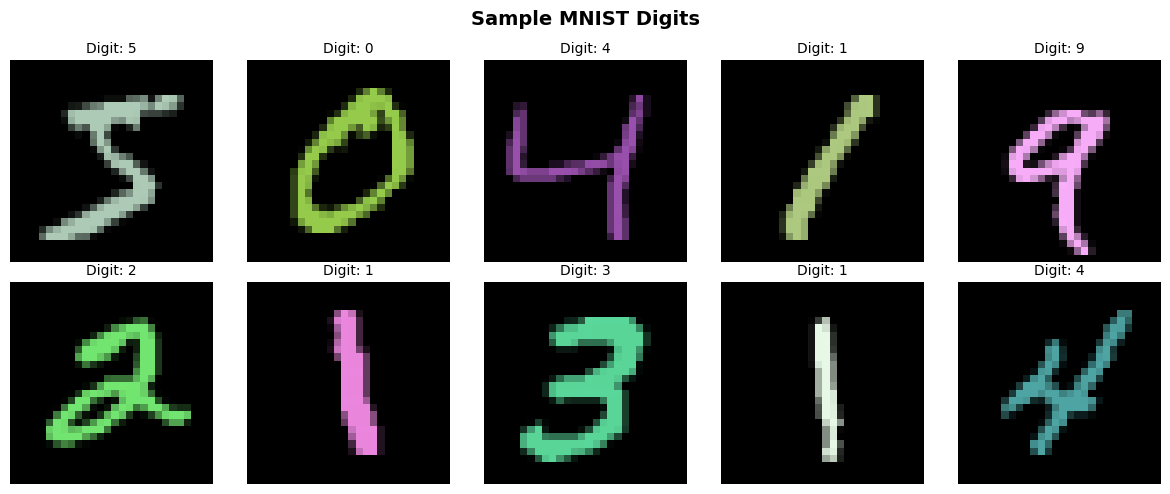

In [18]:
# Custom dataset class for coloured MNIST
class ColouredMNIST(torch.utils.data.Dataset):
    def __init__(self, root, train=True, transform=None):
        self.mnist = torchvision.datasets.MNIST(
            root=root,
            train=train,
            download=True,
            transform=torchvision.transforms.ToTensor()
        )
        self.transform = transform
    
    def __len__(self):
        return len(self.mnist)
    
    def __getitem__(self, idx):
        gray_image, label = self.mnist[idx]
        
        # Colorize the image (use idx as seed for consistency)
        colored_image = colourize_mnist(gray_image, colour_seed=idx)
        
        if self.transform:
            colored_image = self.transform(colored_image)
        
        return colored_image, label

# Create datasets
train_dataset = ColouredMNIST(root='./data', train=True)
test_dataset = ColouredMNIST(root='./data', train=False)

# Create data loaders
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=64,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1000,
    shuffle=False
)

print(f"Training images: {len(train_dataset):,}")
print(f"Test images: {len(test_dataset):,}")

# Show some examples
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(10):
    img, label = train_dataset[i]
    axes[i].imshow(img.permute(1, 2, 0).numpy())
    axes[i].set_title(f'Digit: {label}', fontsize=10)
    axes[i].axis('off')

plt.suptitle('Sample MNIST Digits', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Step 3: Train the Model on Handwritten Digits

Now let's teach our network to recognize digits!

In [19]:
# Set up training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print(f"Training on: {device}")
print("Starting training!\n")

# Train for 3 epochs
num_epochs = 3

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        
        # Forward pass
        optimizer.zero_grad()
        output = model(data)
        
        # Calculate loss
        loss = criterion(output, target)
        
        # Backward pass
        loss.backward()
        optimizer.step()
        
        # Track statistics
        train_loss += loss.item()
        _, predicted = output.max(1)
        total += target.size(0)
        correct += predicted.eq(target).sum().item()
        
        if (batch_idx + 1) % 200 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Batch {batch_idx+1}/{len(train_loader)}, '
                  f'Loss: {train_loss/(batch_idx+1):.3f}, '
                  f'Accuracy: {100.*correct/total:.2f}%')
    
    # Test after each epoch
    model.eval()
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, predicted = output.max(1)
            test_total += target.size(0)
            test_correct += predicted.eq(target).sum().item()
    
    print(f'\n Epoch {epoch+1} Summary:')
    print(f'   Training Accuracy: {100.*correct/total:.2f}%')
    print(f'   Test Accuracy: {100.*test_correct/test_total:.2f}%\n')

print("\n Training complete!")
print("Our model can now recognize digits!")

Training on: cpu
Starting training!

Epoch 1/3, Batch 200/938, Loss: 0.631, Accuracy: 80.80%
Epoch 1/3, Batch 400/938, Loss: 0.413, Accuracy: 87.50%
Epoch 1/3, Batch 600/938, Loss: 0.319, Accuracy: 90.38%
Epoch 1/3, Batch 800/938, Loss: 0.266, Accuracy: 91.98%

 Epoch 1 Summary:
   Training Accuracy: 92.78%
   Test Accuracy: 97.84%

Epoch 2/3, Batch 200/938, Loss: 0.079, Accuracy: 97.73%
Epoch 2/3, Batch 400/938, Loss: 0.071, Accuracy: 97.86%
Epoch 2/3, Batch 600/938, Loss: 0.071, Accuracy: 97.88%
Epoch 2/3, Batch 800/938, Loss: 0.069, Accuracy: 97.93%

 Epoch 2 Summary:
   Training Accuracy: 97.97%
   Test Accuracy: 98.61%

Epoch 3/3, Batch 200/938, Loss: 0.044, Accuracy: 98.68%
Epoch 3/3, Batch 400/938, Loss: 0.046, Accuracy: 98.64%
Epoch 3/3, Batch 600/938, Loss: 0.044, Accuracy: 98.68%
Epoch 3/3, Batch 800/938, Loss: 0.044, Accuracy: 98.66%

 Epoch 3 Summary:
   Training Accuracy: 98.65%
   Test Accuracy: 98.75%


 Training complete!
Our model can now recognize digits!


### Step 4: Test Our Model

Let's see how well our model can recognize digits it has never seen before:

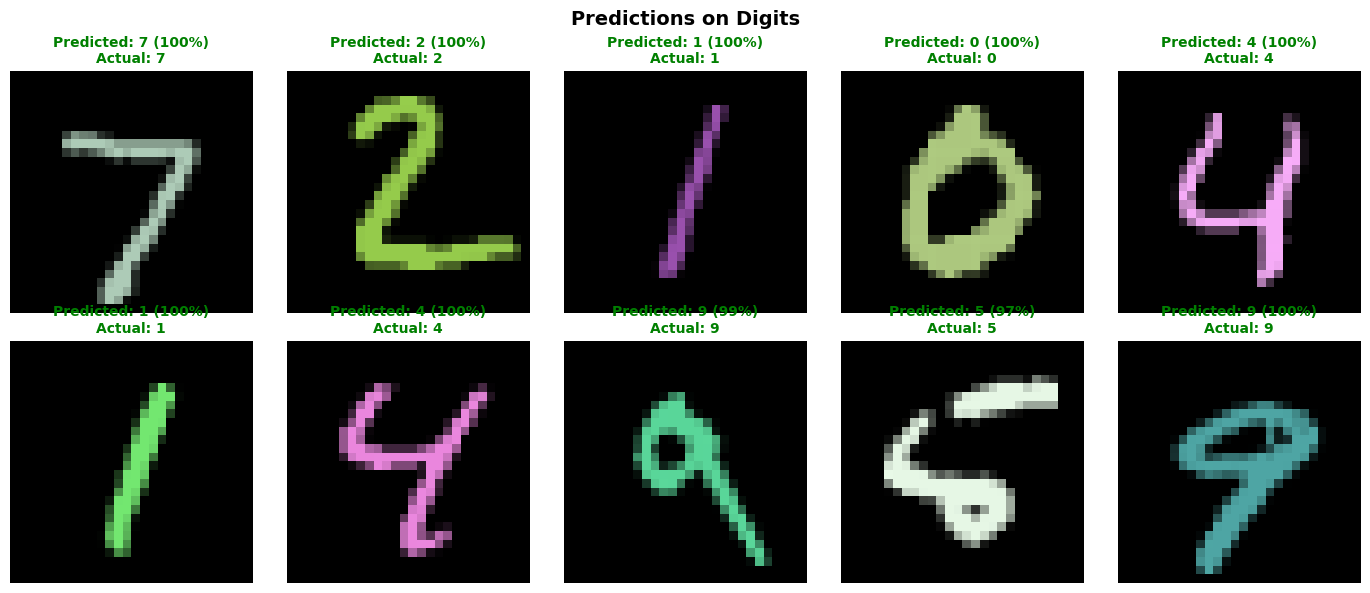

In [20]:
# Get some test images
model.eval()

# Get a batch of test images
test_images = []
test_labels = []
for i in range(10):
    img, label = test_dataset[i]
    test_images.append(img)
    test_labels.append(label)

# Show predictions
fig, axes = plt.subplots(2, 5, figsize=(14, 6))
axes = axes.ravel()

for i in range(10):
    img = test_images[i].to(device)
    
    with torch.no_grad():
        output = model(img.unsqueeze(0))
        probabilities = F.softmax(output, dim=1)
        predicted = output.argmax(dim=1).item()
        confidence = probabilities[0][predicted].item() * 100
    
    # Display
    axes[i].imshow(test_images[i].permute(1, 2, 0).cpu().numpy())
    
    # Colour: green if correct, red if wrong
    actual = test_labels[i]
    colour = 'green' if predicted == actual else 'red'
    
    axes[i].set_title(f'Predicted: {predicted} ({confidence:.0f}%)\nActual: {actual}', 
                     color=colour, fontsize=10, fontweight='bold')
    axes[i].axis('off')

plt.suptitle('Predictions on Digits', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


### Visualizing What the Network Learned from Colour

Let's see what patterns the network learned in its first layer:

First layer filter shape: torch.Size([16, 3, 3, 3])
  → 16 filters, each with 3 input channels (RGB)


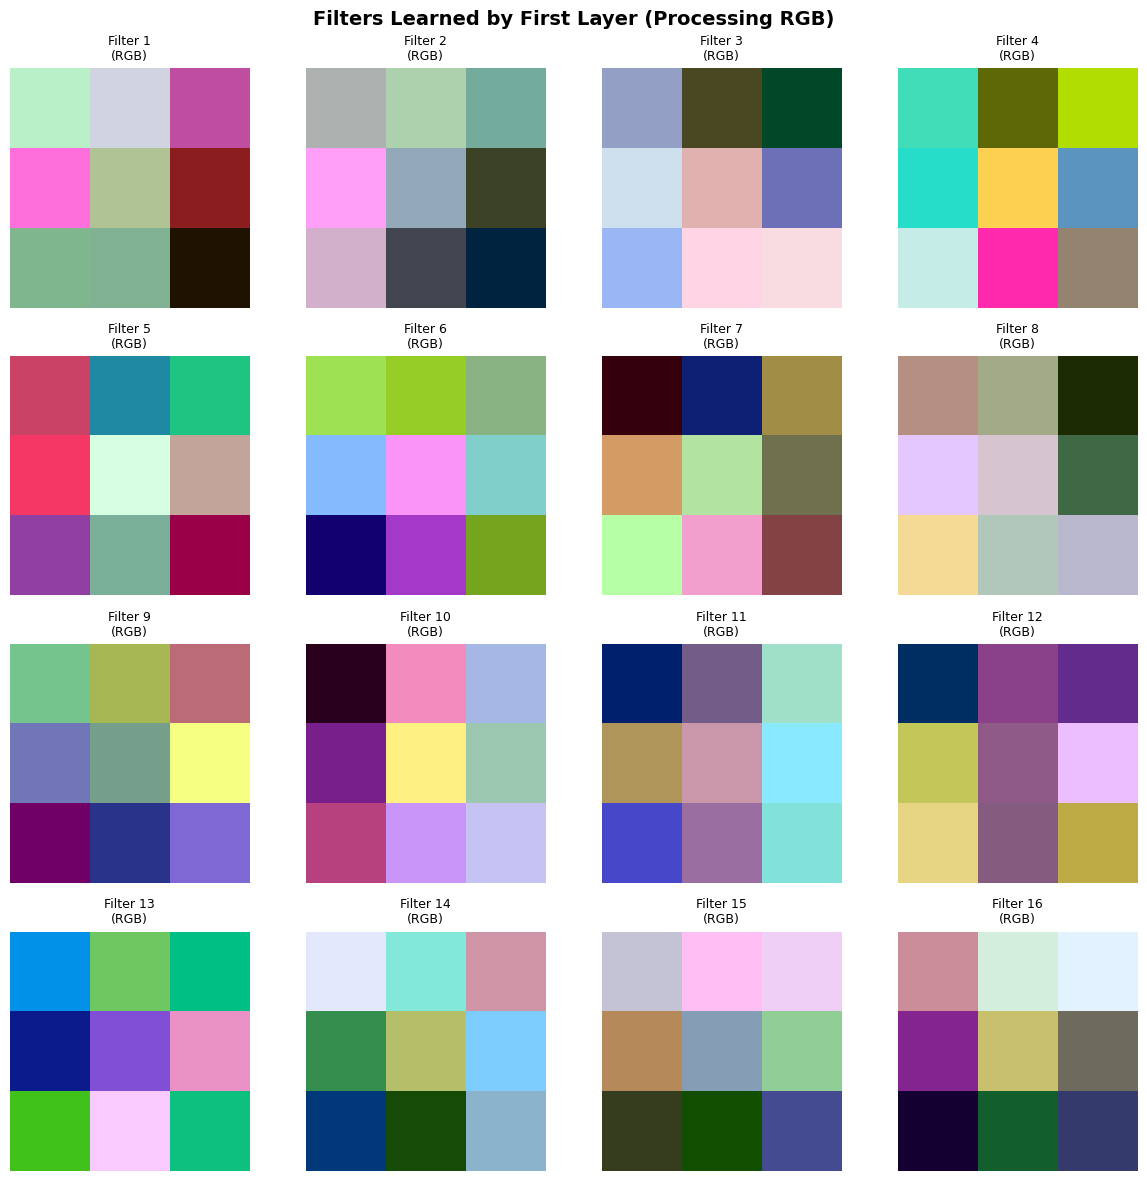

These filters learned to detect patterns in colour!
Each filter combines information from Red, Green, and Blue channels.
The network figured out which colour combinations are useful for recognizing digits!


In [21]:
# Get the filters from the first convolutional layer
filters = model.conv1.weight.data.cpu()

print(f"First layer filter shape: {filters.shape}")
print(f"  → {filters.shape[0]} filters, each with {filters.shape[1]} input channels (RGB)")

# Visualize them - each filter processes all 3 color channels
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()

for i in range(16):
    # Each filter has 3 channels (R, G, B)
    filter_rgb = filters[i]  # Shape: [3, 3, 3]
    
    # Normalize for visualization
    filter_rgb = (filter_rgb - filter_rgb.min()) / (filter_rgb.max() - filter_rgb.min())
    
    # Display as a color image
    axes[i].imshow(filter_rgb.permute(1, 2, 0).numpy())
    axes[i].axis('off')
    axes[i].set_title(f'Filter {i+1}\n(RGB)', fontsize=9)

plt.suptitle('Filters Learned by First Layer (Processing RGB)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("These filters learned to detect patterns in colour!")
print("Each filter combines information from Red, Green, and Blue channels.")
print("The network figured out which colour combinations are useful for recognizing digits!")